In [1]:
# read data function
import gzip
import os
import struct
import numpy as np
import gzip

def load_mnist_train(path, kind='train'): 
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromstring(lbpath.read(),dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

def load_mnist_test(path, kind='t10k'): 
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromstring(lbpath.read(),dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
    return images, labels


In [2]:
X_train,y_train = load_mnist_train('./data', kind='train')
X_test, y_test = load_mnist_test('./data', kind='t10k')
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:1000]
y_test = y_test[:1000]

label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
    print(f"Label {label}: Count = {count}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23764\2577834973.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  labels = np.fromstring(lbpath.read(),dtype=np.uint8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23764\2577834973.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)


Label 0: Count = 97
Label 1: Count = 116
Label 2: Count = 99
Label 3: Count = 93
Label 4: Count = 105
Label 5: Count = 92
Label 6: Count = 94
Label 7: Count = 117
Label 8: Count = 87
Label 9: Count = 100


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23764\2577834973.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  labels = np.fromstring(lbpath.read(),dtype=np.uint8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23764\2577834973.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)


In [3]:
from sklearn.model_selection import train_test_split
# Check if the data file already exists
try:
    data = np.load('mnist_data.npz', allow_pickle=True)
    X_small = data['X_small']
    y_small = data['y_small']
#     print(y_small)
except FileNotFoundError:
    # If the data file does not exist, download and save the data
    X, y = fetch_openml('mnist_784', data_home='./', return_X_y=True)
    X = X / 255.
    X_small = X[:1000]
    y_small = y[:1000]
    # Save the data
    np.savez('mnist_data.npz', X_small=X_small, y_small=y_small)

    
X_small_norm = np.zeros(X_small.shape)
for i in range(X_small.shape[0]):
    X_small_norm[i, :] = (X_small[i] - np.mean(X_small[i])) / np.std(X_small[i])
    
X_train, X_test, y_train, y_test = train_test_split(X_small_norm, y_small, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
    print(f"Label {label}: Count = {count}")

Label 0: Count = 78
Label 1: Count = 96
Label 2: Count = 77
Label 3: Count = 67
Label 4: Count = 90
Label 5: Count = 75
Label 6: Count = 71
Label 7: Count = 93
Label 8: Count = 74
Label 9: Count = 79


In [4]:
def myknn_one(sample, tr_feats, tr_labels, k):
    distances = np.sqrt(np.sum((tr_feats - sample) ** 2, axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = tr_labels[nearest_indices]
    unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
    if len(nearest_labels) == 0:
        predicted_label = tr_labels[0]
    else:
        unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
    return predicted_label

def myknn(samples, tr_feats, tr_labels, k):
    predictions = []

    for sample in samples:
#         print(sample)
        sample = sample.astype(float)
#         print(sample)
#         distances = np.sqrt(np.sum((tr_feats - sample) ** 2, axis=1))
#         nearest_indices = np.argsort(distances)[:k]

        distances = np.linalg.norm(tr_feats - sample, axis=1)
        nearest_indices = np.argpartition(distances, k)[:k]
        nearest_labels = tr_labels[nearest_indices]

        unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
    
        predictions.append(predicted_label)

    return np.array(predictions)


Accuracy: 90.00%


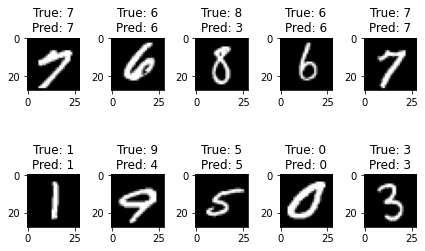

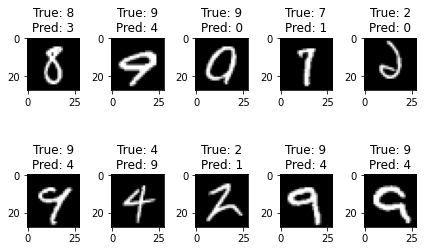

In [5]:
import matplotlib.pyplot as plt

# sample = X_test[8]

# sample_image = sample.reshape(28, 28)

# plt.imshow(sample_image, cmap='gray')
# plt.title(f"Sample Label: {y_test[8]}")  
# plt.show()

# k_value = 5
# predicted_label = myknn(sample, X_train, y_train, k_value)
# print("Predicted Label:", predicted_label)

from sklearn.metrics import accuracy_score

k_value = 1
predicted_labels = myknn(X_test, X_train, y_train, k_value)
y_test = y_test.astype(int)
predicted_labels = predicted_labels.astype(int)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

for i in range(10):
    sample = X_test[i]
    sample_image = sample.reshape(28, 28)
    predicted_label = predicted_labels[i]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

incorrect_indices = np.where(y_test != predicted_labels)[0][:10]
for i in range(10):
    incorrect_index = incorrect_indices[i]
    sample = X_test[incorrect_index]
    sample_image = sample.reshape(28, 28)
    predicted_label = predicted_labels[incorrect_index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"True: {y_test[incorrect_index]}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_value = 5
knn_model = KNeighborsClassifier(n_neighbors=k_value)

knn_model.fit(X_train, y_train)

predicted_labels = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy using KNeighborsClassifier: {accuracy * 100:.2f}%")


Accuracy using KNeighborsClassifier: 87.50%


In [7]:
from tqdm import tqdm  

def cross_validation(X, y, k_values, num_folds=5):
    fold_size = len(X) // num_folds
    error_rates = []

    for k in k_values:
        total_error = 0

        for fold in tqdm(range(num_folds), desc=f'k = {k}'):
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size
            val_data, val_labels = X[val_start:val_end], y[val_start:val_end]

            if len(val_data) == 0:
                continue

            train_data = np.concatenate([X[:val_start], X[val_end:]])
            train_labels = np.concatenate([y[:val_start], y[val_end:]])

            errors = 0
            for i in tqdm(range(len(val_data)), desc=f'i = {fold}'):
                predicted_label = myknn_one(val_data[i], train_data, train_labels, k)
                if predicted_label != val_labels[i]:
                    errors += 1

            error_rate = errors / len(val_data)
            total_error += error_rate

        average_error_rate = total_error / num_folds
        error_rates.append(average_error_rate)

    return error_rates


k = 4:   0%|                                                                                     | 0/5 [00:00<?, ?it/s]


i = 0:  40%|█████████████████████████████▏                                           | 64/160 [00:00<00:00, 603.67it/s]


k = 9: 100%|█████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78it/s]


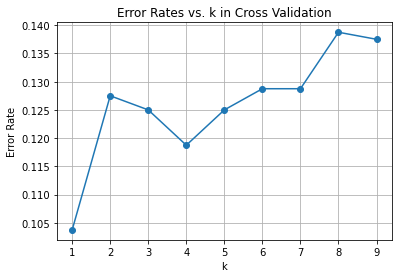

In [8]:
k_values = list(range(1, 10))

error_rates = cross_validation(X_train, y_train, k_values)

plt.plot(k_values, error_rates, marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. k in Cross Validation')
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import f1_score, confusion_matrix

best_k = 1

predicted_labels = []
for test_sample in X_test:
    predicted_label = myknn_one(test_sample, X_train, y_train, best_k)
    predicted_labels.append(predicted_label)

f1_scores = []
for digit in range(10):
    true_labels = (y_test == digit).astype(int)
    predicted_digit = (np.array(predicted_labels) == digit).astype(int)
    f1 = f1_score(true_labels, predicted_digit)
    f1_scores.append(f1)

confusion = confusion_matrix(y_test, predicted_labels)

for digit, f1 in enumerate(f1_scores):
    print(f"F1 Score for digit {digit}: {f1}")

print("Confusion Matrix:")
print(confusion)

F1 Score for digit 0: 0.9268292682926829
F1 Score for digit 1: 0.8695652173913044
F1 Score for digit 2: 0.9047619047619048
F1 Score for digit 3: 0.9615384615384616
F1 Score for digit 4: 0.8235294117647058
F1 Score for digit 5: 0.9411764705882353
F1 Score for digit 6: 0.9333333333333332
F1 Score for digit 7: 0.888888888888889
F1 Score for digit 8: 0.8695652173913044
F1 Score for digit 9: 0.8421052631578947
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 1  1 19  0  0  0  0  1  0  0]
 [ 0  0  0 25  0  1  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  1]
 [ 0  0  1  0  0 16  0  0  0  0]
 [ 1  1  0  0  0  0 21  0  0  0]
 [ 0  3  0  0  1  0  0 20  0  0]
 [ 0  1  0  1  0  0  1  0 10  0]
 [ 1  0  0  0  4  0  0  0  0 16]]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix

In [11]:
knn_model = KNeighborsClassifier()

k_values = list(range(1, 10))

f1_scores = []
for k in k_values:
    knn_model.n_neighbors = k
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_macro')
    f1_scores.append(scores.mean())


In [12]:
best_k = k_values[np.argmax(f1_scores)]
print(f"The best k value is: {best_k}")

The best k value is: 1


In [13]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

best_knn_model.fit(X_train, y_train)

predicted_labels = best_knn_model.predict(X_test)

In [14]:
f1_scores = []
for digit in range(10):
    true_labels = (y_test == digit).astype(int)
    predicted_digit = (predicted_labels == digit).astype(int)
    f1 = f1_score(true_labels, predicted_digit)
    f1_scores.append(f1)
    print(f"F1 Score for digit {digit}: {f1}")

confusion = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix:")
print(confusion)


F1 Score for digit 0: 0.9268292682926829
F1 Score for digit 1: 0.8695652173913044
F1 Score for digit 2: 0.9047619047619048
F1 Score for digit 3: 0.9615384615384616
F1 Score for digit 4: 0.8235294117647058
F1 Score for digit 5: 0.9411764705882353
F1 Score for digit 6: 0.9333333333333332
F1 Score for digit 7: 0.888888888888889
F1 Score for digit 8: 0.8695652173913044
F1 Score for digit 9: 0.8421052631578947
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 1  1 19  0  0  0  0  1  0  0]
 [ 0  0  0 25  0  1  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  1]
 [ 0  0  1  0  0 16  0  0  0  0]
 [ 1  1  0  0  0  0 21  0  0  0]
 [ 0  3  0  0  1  0  0 20  0  0]
 [ 0  1  0  1  0  0  1  0 10  0]
 [ 1  0  0  0  4  0  0  0  0 16]]
